<a href="https://colab.research.google.com/github/saad-ameer/Python-for-Data-Analyst/blob/main/seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Seaborn

* **Overview**:
  - Seaborn is a high-level Python data visualization library built on top of **Matplotlib**.
  - Focuses on **aesthetics** — produces clean, visually appealing plots.
  - Requires **less code** than Matplotlib for similar results.
  - Integrates seamlessly with **pandas DataFrames**.
  - Can be used **together with Matplotlib** for combined functionality.

* **Why Seaborn?**
  - Better default styles and color palettes.
  - Simplifies statistical visualizations.
  - Direct support for pandas columns as arguments (`x="col1", y="col2", data=df`).

* **Chart Categories in Seaborn**:
  - **Relational**: e.g., `scatterplot()`, `lineplot()`
  - **Distribution**: e.g., `histplot()`, `kdeplot()`
  - **Categorical**: e.g., `barplot()`, `boxplot()`, `violinplot()`
  - **Regression**: e.g., `regplot()`, `lmplot()`
  - **Matrix**: e.g., `heatmap()`
  - **Multi-plot grids**: e.g., `FacetGrid`, `pairplot()`

* **Installation**:
  - Already included with **Anaconda**.
  - If missing:
    ```bash
    conda install seaborn
    ```
    or
    ```bash
    pip install seaborn
    ```

* **Learning Resources**:
  - **Official Documentation**: [https://seaborn.pydata.org](https://seaborn.pydata.org)
  - Gallery of example plots
  - Tutorials for each chart category

---

## Basic Example

```python
import seaborn as sns
import pandas as pd

# Example DataFrame
df = sns.load_dataset("penguins")

# Simple scatter plot
sns.scatterplot(x="flipper_length_mm", y="body_mass_g", data=df)
```

---

# Categorical Plots in Seaborn

Seaborn simplifies creating and customizing categorical plots compared to Matplotlib. It works well with pandas DataFrames and makes adding legends and handling categorical data easier. Since Seaborn is built on top of Matplotlib, you can use both together to enhance visualizations.

---

## General Notes
* Most Seaborn plot functions accept:
  - `x` and `y` arguments for variables
  - `data` argument for DataFrame, allowing direct reference to column names
  - `hue` for color grouping
  - `ax` to specify a subplot axes
* Many categorical plots have an `estimator` parameter (default: `mean`) to aggregate data, which can be changed (e.g., to `sum`).
* `ci` specifies confidence intervals (default: 95%). Set to `None` to remove.
* `dodge` can adjust alignment when using `hue`.

---

## Bar Plot (`sns.barplot`)
```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

countries = pd.read_csv("top10_countries_updated.csv")

# Basic bar plot
sns.barplot(x="region", y="population", data=countries)

# Remove confidence interval
sns.barplot(x="region", y="population", data=countries, ci=None)

# Horizontal bar plot
sns.barplot(y="region", x="population", data=countries)

# Aggregation using sum
sns.barplot(x="region", y="population", data=countries, estimator=sum)

# Grouped by hue
sns.barplot(x="country", y="population", hue="region", data=countries, dodge=False)
```

---

## Using Matplotlib and Seaborn Together
```python
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), tight_layout=True)

# First plot on ax1
sns.barplot(x="region", y="population", data=countries, ci=None, ax=ax1)

# Second plot on ax2
sns.barplot(x="country", y="population", hue="region", data=countries, dodge=False, ax=ax2)

plt.show()
```

---

## Count Plot (`sns.countplot`)
* Similar to bar plot but counts occurrences instead of aggregating a numeric column.

```python
sns.countplot(x="region", data=countries)
sns.countplot(y="region", data=countries)
```

---

## Box Plot (`sns.boxplot`)

* Displays distribution, quartiles, and outliers.

```python
players = pd.read_csv("fifa21_top100.csv")

# Basic box plot
sns.boxplot(y="overall", data=players)

# Horizontal and remove outliers
sns.boxplot(x="overall", data=players, flierprops={'markersize': 0})

# Box plot grouped by category
sns.boxplot(x="league_name", y="overall", data=players)
```

---

## Violin Plot (`sns.violinplot`)
* Combines a box plot with a kernel density estimate.

```python
sns.violinplot(x="league_name", y="overall", data=players)
```

---

## Strip Plot (`sns.stripplot`) and Swarm Plot (`sns.swarmplot`)
* Show individual observations; swarm plot avoids overlaps.

```python
# Strip plot over a box plot
sns.boxplot(x="league_name", y="overall", data=players)
sns.stripplot(x="league_name", y="overall", data=players, color='black')

# Swarm plot
sns.swarmplot(x="league_name", y="overall", data=players)
```

---

## Point Plot (`sns.pointplot`)
* Shows mean values and confidence intervals for categories.

```python
# Mean overall score
sns.pointplot(x="overall", data=players)

# Group by preferred foot
sns.pointplot(x="preferred_foot", y="overall", data=players)

# Group with hue
sns.pointplot(x="preferred_foot", y="overall", hue="league_name", data=players)
```

---

## Key Advantages of Seaborn for Categorical Data
* Less code for cleaner plots compared to Matplotlib.
* Built-in handling of aggregation and confidence intervals.
* Easy integration with pandas DataFrames and `hue` grouping.
* Works seamlessly with Matplotlib for figure size, layouts, and additional customization.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
countries_df = pd.read_csv('top_10_countries.csv')

In [4]:
countries_df

,Rank,Country,Region,Sub Region,Population,% of world,Date
0,1,China,Asia,Eastern Asia,1412600000,17.80%,31-Dec-21
1,2,India,Asia,Southern Asia,1386946912,17.50%,18-Jan-22
2,3,United States,Americas,Northern America,333073186,4.20%,18-Jan-22
3,4,Indonesia,Asia,Southeast Asia,271350000,3.42%,31-Dec-20
4,5,Pakistan,Asia,Southern Asia,225200000,2.84%,01-Jul-21
5,6,Brazil,Americas,Southern America,214231641,2.70%,18-Jan-22
6,7,Nigeria,Africa,Western Africa,211401000,2.67%,01-Jul-21
7,8,Bangladesh,Asia,Southern Asia,172062576,2.17%,18-Jan-22
8,9,Russia,Europe,Eastern Europe,146171015,1.84%,01-Jan-21
9,10,Mexico,Americas,Central America,126014024,1.59%,02-Mar-20


<Axes: xlabel='Region', ylabel='Population'>

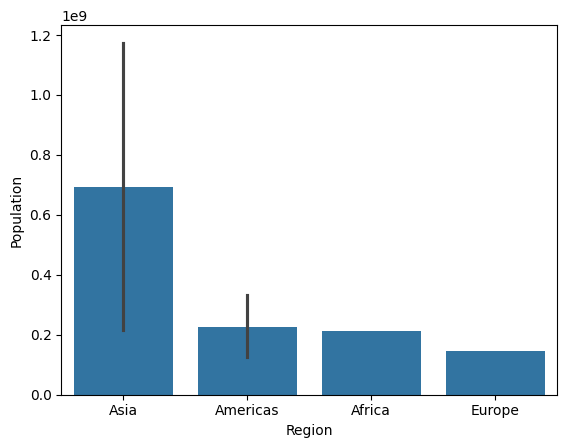

In [5]:
sns.barplot(x=countries_df['Region'], y=countries_df['Population'])

/tmp/ipython-input-2789709432.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=countries_df['Region'], y=countries_df['Population'], palette='rocket')


<Axes: xlabel='Region', ylabel='Population'>

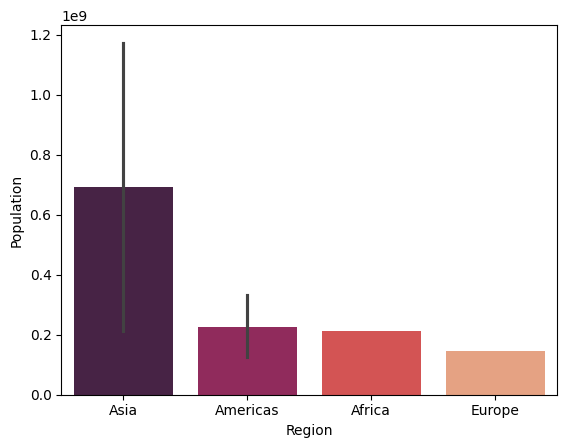

In [7]:
sns.barplot(x=countries_df['Region'], y=countries_df['Population'], palette='rocket')

"Sequential Palettes (for ordered data): These are good for showing variations across a range. Examples: 'viridis', 'plasma', 'inferno', 'magma', 'cividis'.\nDiverging Palettes (for data with a central value): Useful when you want to highlight deviations from a midpoint. Examples: 'coolwarm', 'bwr', 'seismic'.\nQualitative Palettes (for distinct categories): Best for distinguishing between categories that don't have an inherent order. Examples: 'tab10', 'tab20', 'Paired', 'Set1', 'Set2', 'Set3'."

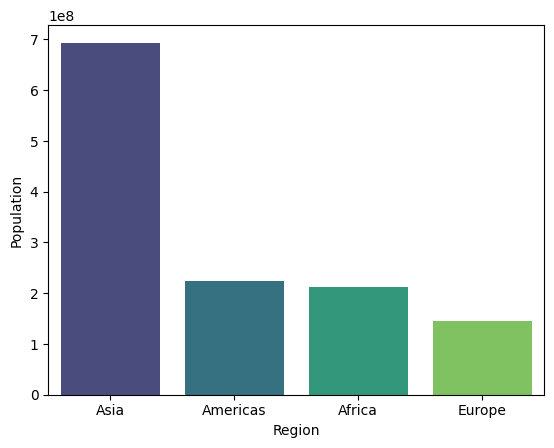

In [12]:
sns.barplot(x=countries_df['Region'], y=countries_df['Population'], errorbar=None, hue=countries_df['Region'], palette='viridis' , legend=False)

"""Sequential Palettes (for ordered data): These are good for showing variations across a range. Examples: 'viridis', 'plasma', 'inferno', 'magma', 'cividis'.
Diverging Palettes (for data with a central value): Useful when you want to highlight deviations from a midpoint. Examples: 'coolwarm', 'bwr', 'seismic'.
Qualitative Palettes (for distinct categories): Best for distinguishing between categories that don't have an inherent order. Examples: 'tab10', 'tab20', 'Paired', 'Set1', 'Set2', 'Set3'."""

<Axes: xlabel='Population', ylabel='Region'>

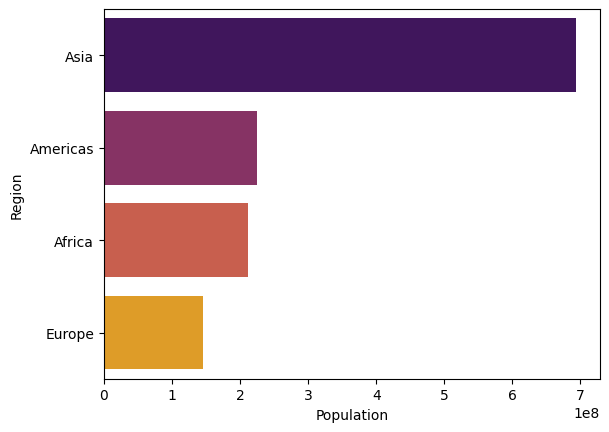

In [18]:
sns.barplot(y='Region', x='Population', data=countries_df, hue='Region', palette='inferno', errorbar=None)

<Axes: xlabel='Region', ylabel='Population'>

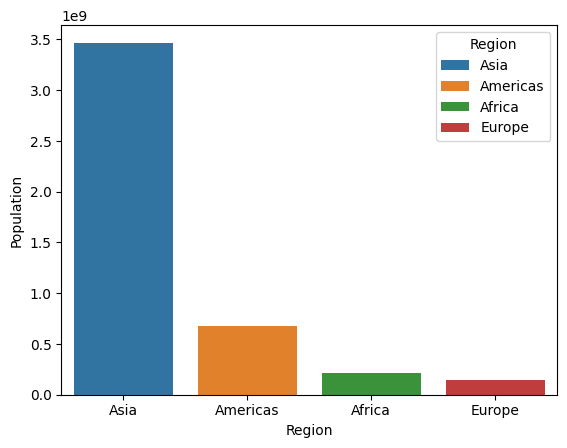

In [24]:
sns.barplot(x='Region', y='Population', data=countries_df, errorbar=None, estimator=sum, hue='Region', dodge=False, legend=True)

<Axes: xlabel='Region', ylabel='Population'>

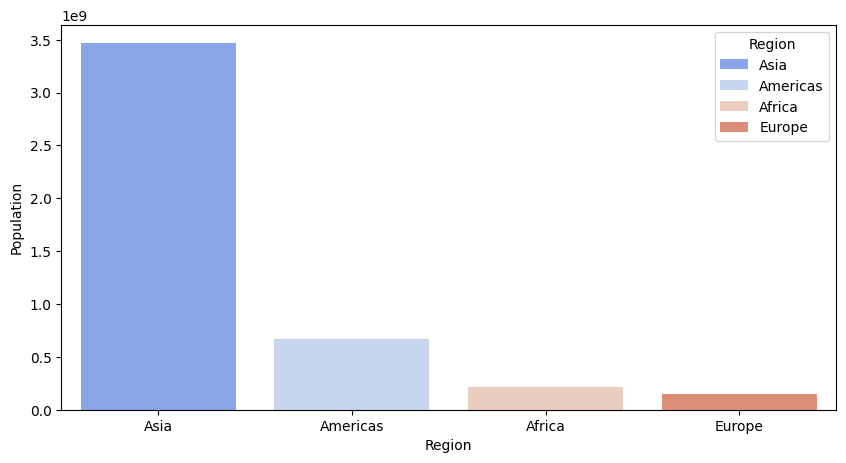

In [27]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Region', y='Population', data=countries_df, errorbar=None, estimator=sum, hue='Region', dodge=False, legend=True, palette='coolwarm')

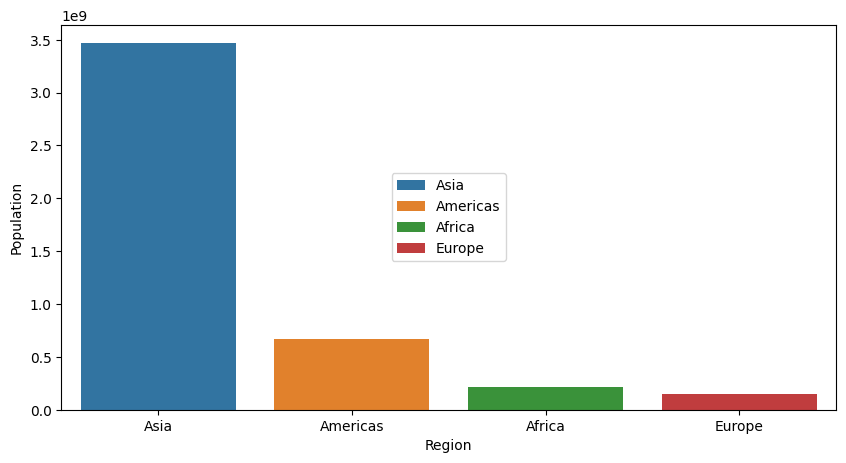

In [29]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Region', y='Population', data=countries_df, errorbar=None, estimator=sum, hue='Region', dodge=False, legend=True, palette='tab10')

plt.legend(loc='center')

plt.show()

<Axes: xlabel='Country', ylabel='Population'>

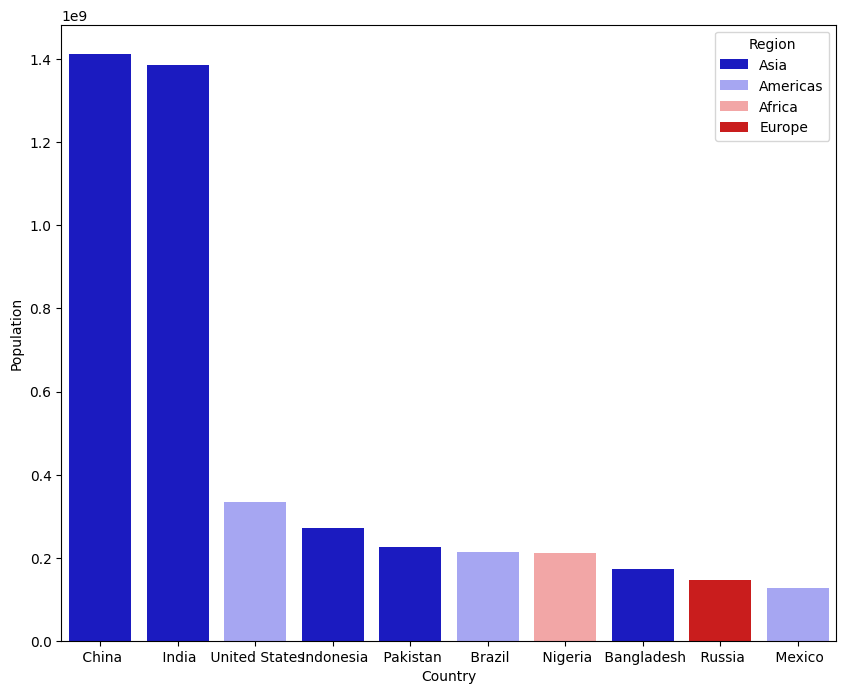

In [30]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Country', y='Population', data=countries_df, errorbar=None, estimator=sum, hue='Region', dodge=False, legend=True, palette='seismic')

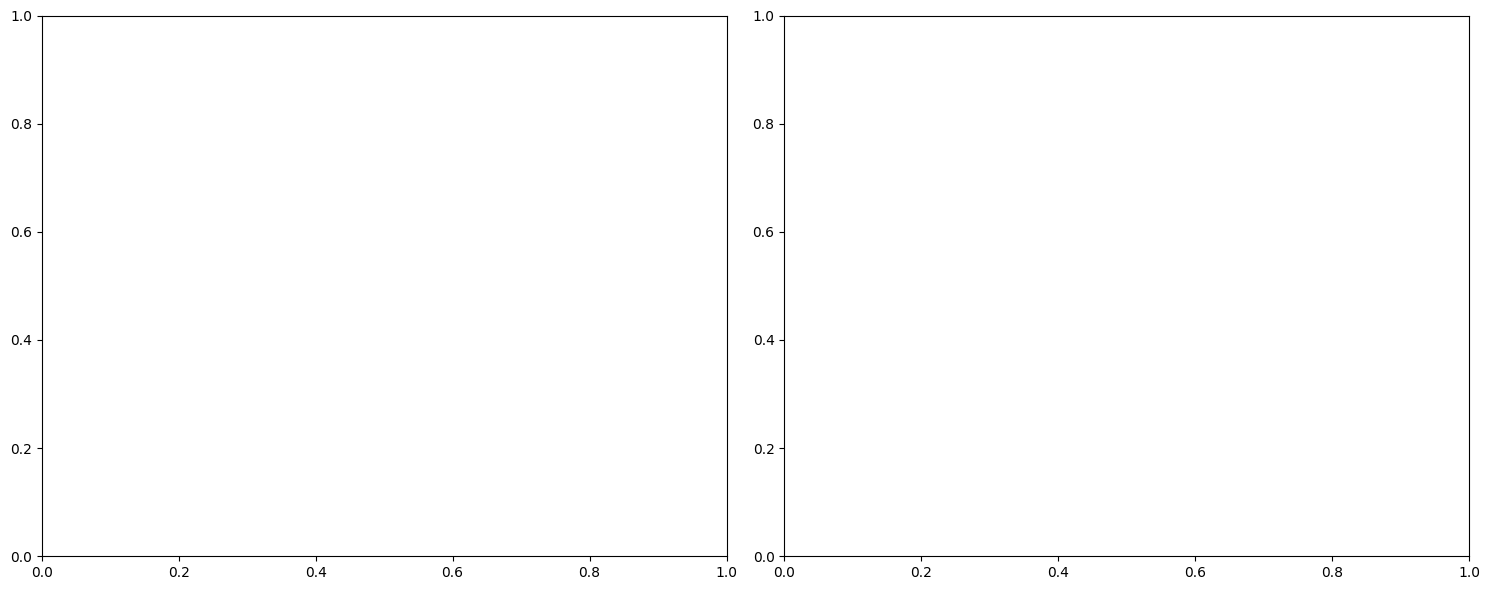

In [38]:
fig, (ax1,ax2)= plt.subplots(1,2, figsize=(15,6), tight_layout=True)

<Axes: xlabel='Country', ylabel='Population'>

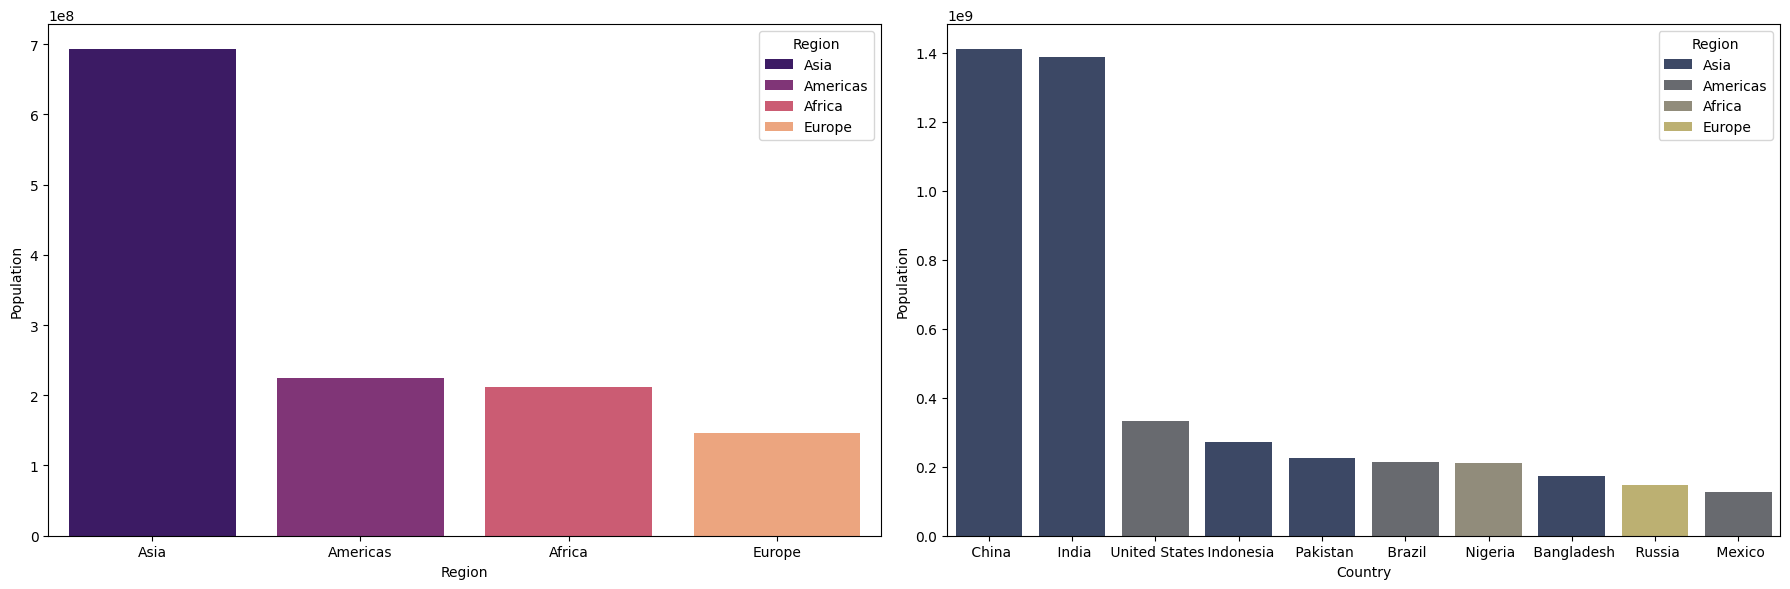

In [48]:
fig, (ax1,ax2)= plt.subplots(1,2, figsize=(18,6), tight_layout=True)

sns.barplot(x='Region', y='Population', data=countries_df, errorbar=None, ax=ax1, hue='Region', palette='magma', legend=True, dodge=False)
sns.barplot(x='Country', y='Population', data=countries_df, errorbar=None, ax=ax2, hue='Region', dodge=False, legend=True, palette='cividis')

In [49]:
countries_df

,Rank,Country,Region,Sub Region,Population,% of world,Date
0,1,China,Asia,Eastern Asia,1412600000,17.80%,31-Dec-21
1,2,India,Asia,Southern Asia,1386946912,17.50%,18-Jan-22
2,3,United States,Americas,Northern America,333073186,4.20%,18-Jan-22
3,4,Indonesia,Asia,Southeast Asia,271350000,3.42%,31-Dec-20
4,5,Pakistan,Asia,Southern Asia,225200000,2.84%,01-Jul-21
5,6,Brazil,Americas,Southern America,214231641,2.70%,18-Jan-22
6,7,Nigeria,Africa,Western Africa,211401000,2.67%,01-Jul-21
7,8,Bangladesh,Asia,Southern Asia,172062576,2.17%,18-Jan-22
8,9,Russia,Europe,Eastern Europe,146171015,1.84%,01-Jan-21
9,10,Mexico,Americas,Central America,126014024,1.59%,02-Mar-20


/tmp/ipython-input-2772645126.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=countries_df['Region'], palette='plasma')


<Axes: xlabel='count', ylabel='Region'>

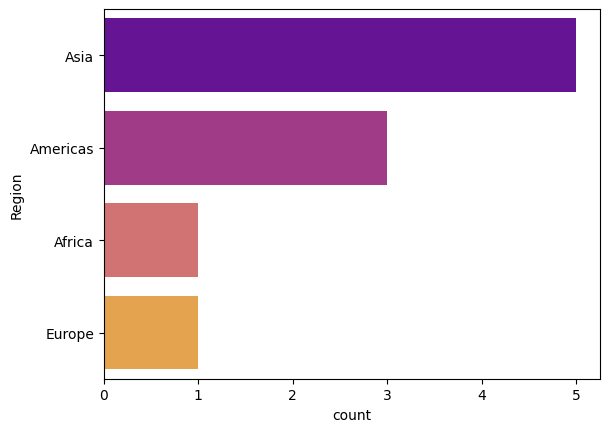

In [52]:
sns.countplot(y=countries_df['Region'], palette='plasma')

In [53]:
players=pd.read_csv('players_21_top_100.csv')

/tmp/ipython-input-2431071262.py:1: DtypeWarning: Columns (1,2,3,5,8,9,10,16,17,21,22,23,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  players=pd.read_csv('players_21_top_100.csv')


In [54]:
pd.set_option('display.max_columns', False)

In [55]:
players.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023.0,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33.0,24/06/1987,170.0,72.0,Argentina,FC Barcelona,Spain Primera Division,1.0,93.0,93.0,67500000.0,560000.0,"RW, ST, CF",Left,5.0,4.0,4.0,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,01/07/2004,2021.0,RW,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,...,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801.0,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35.0,05/02/1985,187.0,83.0,Portugal,Juventus,Italian Serie A,1.0,92.0,92.0,46000000.0,220000.0,"ST, LW",Right,5.0,4.0,5.0,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,10/07/2018,2022.0,LS,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,...,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389.0,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27.0,07/01/1993,188.0,87.0,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91.0,93.0,75000000.0,125000.0,GK,Right,3.0,3.0,1.0,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,NaN,GK,13.0,NaN,16/07/2014,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,...,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545.0,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31.0,21/08/1988,184.0,80.0,Poland,FC Bayern München,German 1. Bundesliga,1.0,91.0,91.0,80000000.0,240000.0,ST,Right,4.0,4.0,4.0,High/Medium,PLAYER_BODY_TYPE_276,Yes,132000000.0,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,01/07/2014,2023.0,NaN,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,...,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871.0,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28.0,05/02/1992,175.0,68.0,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91.0,91.0,90000000.0,270000.0,"LW, CAM",Right,5.0,5.0,5.0,High/Medium,Neymar,Yes,166500000.0,"#Speedster, #Dribbler, #Playmaker, #FK Special...",LW,10.0,NaN,03/08/2017,2022.0,NaN,NaN,91.0,85.0,86.0,94.0,36.0,59.0,NaN,...,51,36,87,90,92,93,NaN,30,29,9,9,15,15,11,84+3,84+3,84+3,90+0,89+0,89+0,89+0,90+0,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


<Axes: ylabel='overall'>

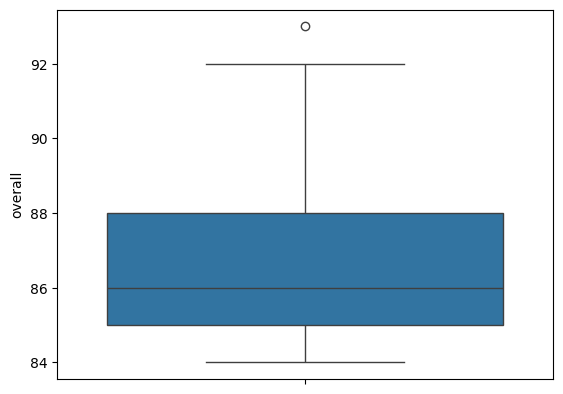

In [56]:
sns.boxplot(y=players['overall'])

/tmp/ipython-input-1265345904.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=players['overall'], fliersize=0, palette='Set2')


<Axes: ylabel='overall'>

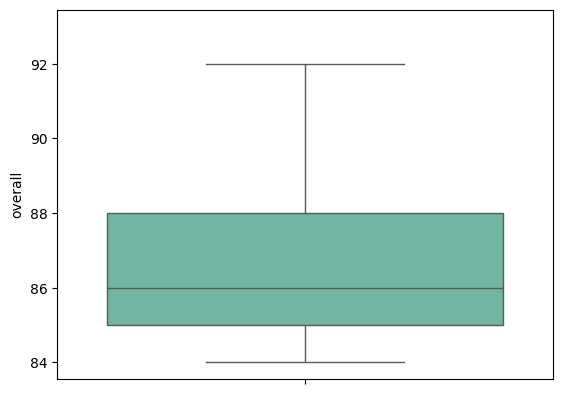

In [57]:
sns.boxplot(y=players['overall'], fliersize=0, palette='Set2')

/tmp/ipython-input-2616272422.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=players['overall'], x=players['league_name'], palette='tab20')


<Axes: xlabel='league_name', ylabel='overall'>

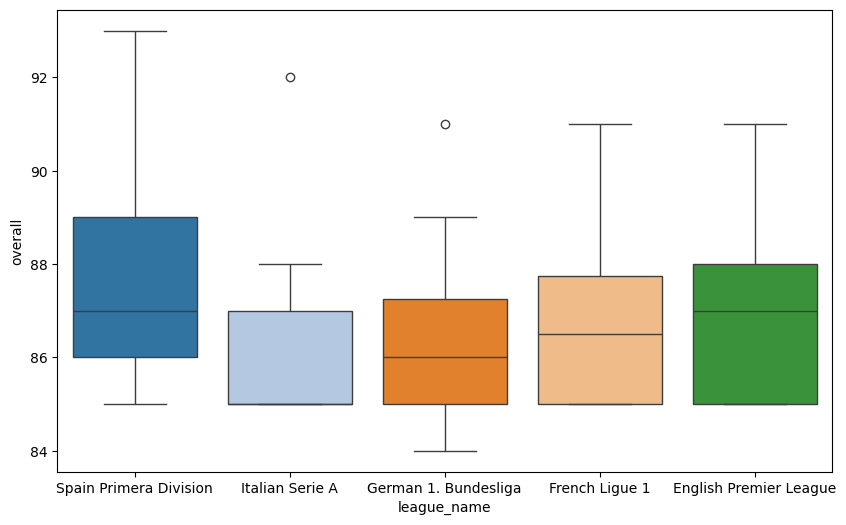

In [61]:
"""Sequential Palettes (for ordered data): These are good for showing variations across a range. Examples: 'viridis', 'plasma', 'inferno', 'magma', 'cividis'.
Diverging Palettes (for data with a central value): Useful when you want to highlight deviations from a midpoint. Examples: 'coolwarm', 'bwr', 'seismic'.
Qualitative Palettes (for distinct categories): Best for distinguishing between categories that don't have an inherent order. Examples: 'tab10', 'tab20', 'Paired', 'Set1', 'Set2', 'Set3'."""


plt.figure(figsize=(10,6))
sns.boxplot(y=players['overall'], x=players['league_name'], palette='tab20')

/tmp/ipython-input-3980677836.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=players['overall'], x=players['league_name'], palette='Paired')


<Axes: xlabel='league_name', ylabel='overall'>

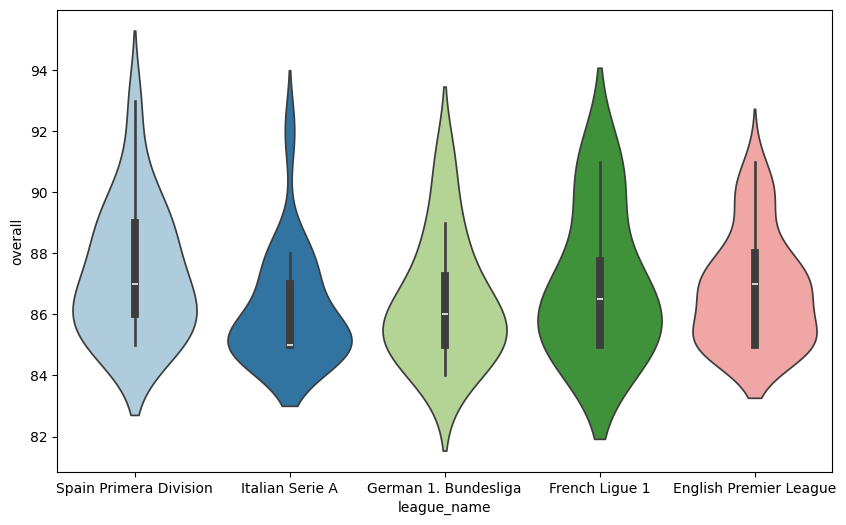

In [62]:
plt.figure(figsize=(10,6))
sns.violinplot(y=players['overall'], x=players['league_name'], palette='Paired')

/tmp/ipython-input-3572982906.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(y=players['overall'], x=players['league_name'], palette='Set1')


<Axes: xlabel='league_name', ylabel='overall'>

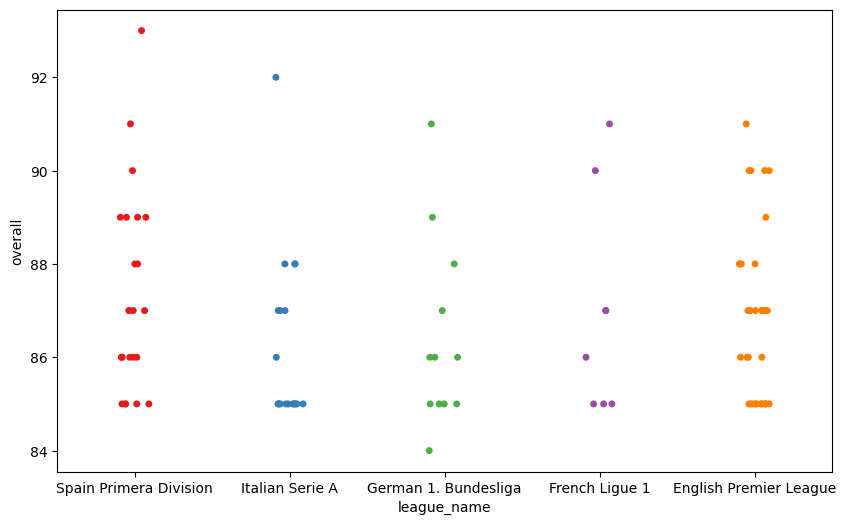

In [64]:
plt.figure(figsize=(10,6))
sns.stripplot(y=players['overall'], x=players['league_name'], palette='Set1')

/tmp/ipython-input-1927699631.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(y=players['overall'], x=players['league_name'], palette='Set1')
/tmp/ipython-input-1927699631.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=players['overall'], x=players['league_name'], palette='Set3', fliersize=0)


<Axes: xlabel='league_name', ylabel='overall'>

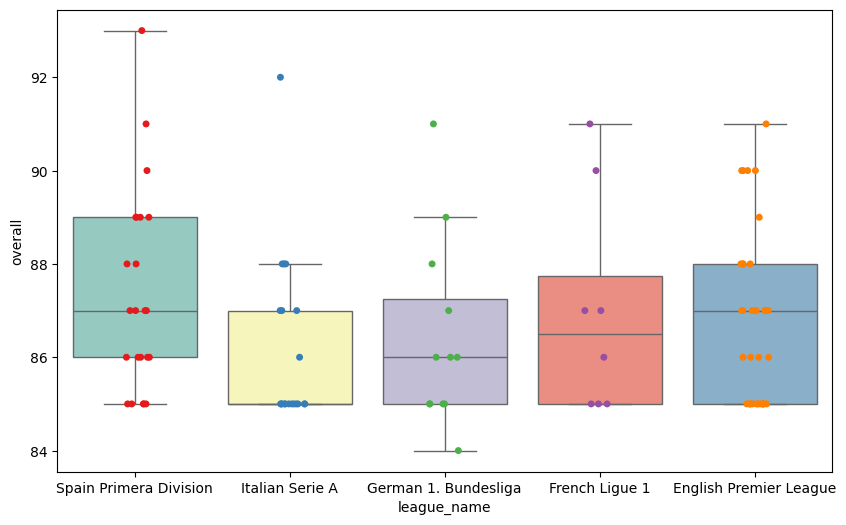

In [70]:
plt.figure(figsize=(10,6))
sns.stripplot(y=players['overall'], x=players['league_name'], palette='Set1')
sns.boxplot(y=players['overall'], x=players['league_name'], palette='Set3', fliersize=0)

/tmp/ipython-input-3473705545.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=players['overall'], x=players['league_name'], palette='Set3', fliersize=0)


<Axes: xlabel='league_name', ylabel='overall'>

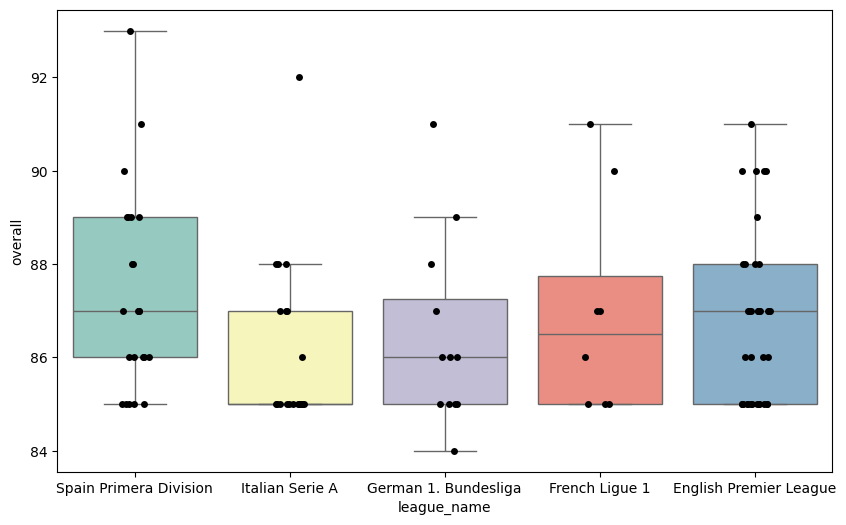

In [72]:
plt.figure(figsize=(10,6))
sns.stripplot(y=players['overall'], x=players['league_name'], color='black')
sns.boxplot(y=players['overall'], x=players['league_name'], palette='Set3', fliersize=0)

<Axes: xlabel='overall'>

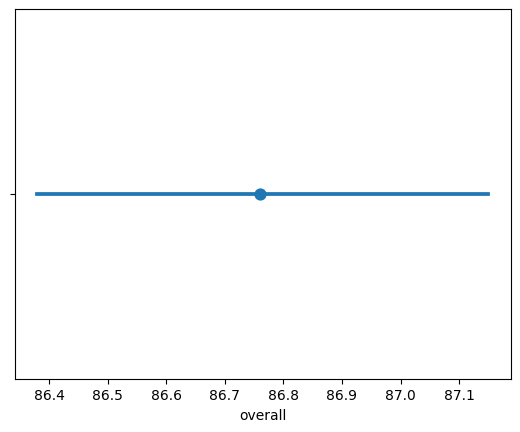

In [75]:
sns.pointplot(x=players['overall'])

<Axes: xlabel='overall', ylabel='preferred_foot'>

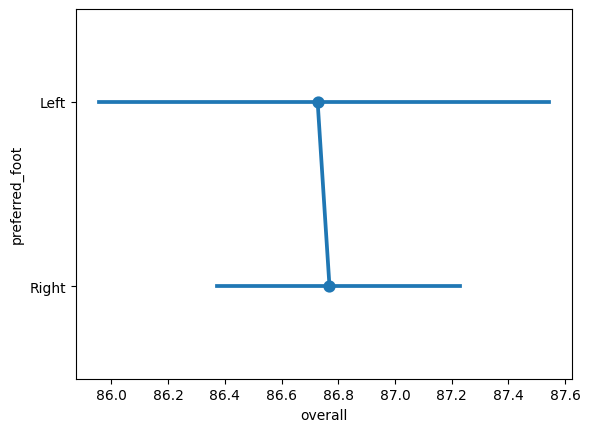

In [76]:
sns.pointplot(x=players['overall'], y=players['preferred_foot'])

<Axes: xlabel='overall', ylabel='league_name'>

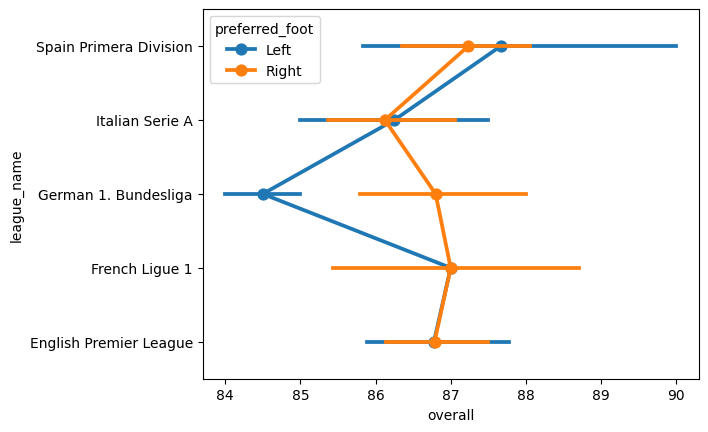

In [81]:
sns.pointplot(x='overall', hue='preferred_foot', y='league_name', data=players)